FINAL AFTER PRE-PROCESSING !!!

In [1]:
import pandas as pd
import re


from sklearn.preprocessing import LabelEncoder

# Load datasets
df_2022 = pd.read_csv('policecalls2022.csv')
df_2023 = pd.read_csv('policecalls2023.csv')
df_2024 = pd.read_csv('policecalls2024.csv')

# Combine the datasets
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Print the initial number of rows
initial_rows = combined_df.shape[0]

# Drop rows where 'ADDRESS' is missing
rows_with_missing_address = combined_df['ADDRESS'].isnull().sum()  # Count rows with missing addresses
combined_df = combined_df.dropna(subset=['ADDRESS'])  # Drop rows with missing addresses

# Print the updated number of rows
final_rows = combined_df.shape[0]

# Print details about missing rows
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows with missing 'ADDRESS': {rows_with_missing_address}")
print(f"Final number of rows after dropping missing 'ADDRESS': {final_rows}")

# Merge CITY and STATE into LOCATION and drop original columns
combined_df['LOCATION'] = combined_df['CITY'] + ', ' + combined_df['STATE']
combined_df.drop(['CITY', 'STATE'], axis=1, inplace=True)

# Convert OFFENSE_DATE to datetime format
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Extract YEAR, MONTH, and HOUR from OFFENSE_DATE
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['HOUR'] = pd.to_datetime(combined_df['OFFENSE_TIME'], format='%H:%M:%S').dt.hour

# Encode CALL_TYPE and replace the original column
call_type_encoder = LabelEncoder()
combined_df['CALL_TYPE'] = call_type_encoder.fit_transform(combined_df['CALL_TYPE'])

# Encode FINAL_DISPO and replace the original column
final_dispo_encoder = LabelEncoder()
combined_df['FINAL_DISPO'] = final_dispo_encoder.fit_transform(combined_df['FINAL_DISPO'])

# Get mappings for CALL_TYPE and FINAL_DISPO
call_type_mapping = dict(zip(call_type_encoder.classes_, call_type_encoder.transform(call_type_encoder.classes_)))
final_dispo_mapping = dict(zip(final_dispo_encoder.classes_, final_dispo_encoder.transform(final_dispo_encoder.classes_)))

combined_df.drop(['START_DATE', 'REPORT_DATE','OFFENSE_DATE','OFFENSE_TIME'], axis=1, inplace=True)

# Sample data (assuming combined_df is already loaded)
# combined_df = pd.read_csv("your_data.csv") # Uncomment if reading from a CSV

# Function to clean and standardize the address
def clean_address(address):
    # Check if address is missing
    if pd.isna(address):
        return address  # Return as is if it's NaN
    
    # Remove block ranges (e.g., [1300]-[1400]) by removing anything within square brackets
    address = re.sub(r'\[\d+\]-\[\d+\]', '', address).strip()
    return address

# Apply the cleaning function to the ADDRESS column
combined_df['ADDRESS'] = combined_df['ADDRESS'].apply(clean_address)

# Display the updated DataFrame
#print(combined_df.head())
# Display the updated DataFrame
print(combined_df.tail())

# Display the mappings
print("\nCALL_TYPE Encoding Mapping:")
print(call_type_mapping)

print("\nFINAL_DISPO Encoding Mapping:")
print(final_dispo_mapping)






Initial number of rows: 814737
Number of rows with missing 'ADDRESS': 23102
Final number of rows after dropping missing 'ADDRESS': 791635
                    CDTS       EID CALL_NUMBER  PRIORITY CALLTYPE_CODE  \
814731  20241102215700PD  10233737  P243070747         2            6M   
814732  20241102204554PD  10233738  P243070748         2           415   
814733  20241102202300PD  10233741  P243070749         1        SUSCIR   
814734  20241102234601PD  10233744  P243070751         3          459R   
814736  20241102203555PD  10233746  P243070753         3           484   

        CALL_TYPE FINAL_DISPO_CODE  FINAL_DISPO                  ADDRESS  \
814731        111                B            1                 S 6TH ST   
814732         49                G            6  ALMADEN EX & COLEMAN RD   
814733        169                N            9                CHERRY AV   
814734         31                R           11                RIDING CT   
814736        180                R   

In [7]:
import re
import pandas as pd

# Sample data (assuming combined_df is already loaded)
# combined_df = pd.read_csv("your_data.csv") # Uncomment if reading from a CSV

# Function to clean and standardize the address
def clean_address(address):
    # Check if address is missing
    if pd.isna(address):
        return address  # Return as is if it's NaN
    
    # Remove block ranges (e.g., [1300]-[1400]) by removing anything within square brackets
    address = re.sub(r'\[\d+\]-\[\d+\]', '', address).strip()
    return address

# Apply the cleaning function to the ADDRESS column
combined_df['ADDRESS'] = combined_df['ADDRESS'].apply(clean_address)




KMEANS - SELECTING OPTIMAL CLUSTERS - USING ELBOW METHOD

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
features = combined_df[['YEAR', 'MONTH', 'HOUR']]

# Standardize the features to bring them on the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (you can experiment with different values)
n_clusters = 4  # Change this to test different cluster numbers

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
combined_df['CLUSTER'] = kmeans.fit_predict(scaled_features)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# # Calculate the Silhouette Score
# silhouette_avg = silhouette_score(scaled_features, combined_df['CLUSTER'])
# print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


# Add cluster labels to the original DataFrame and display a sample
print("\nCluster Assignments (Sample):")
print(combined_df[['YEAR', 'MONTH', 'HOUR', 'CLUSTER']].head())

# # Visualize the clustering result (using first two features)
# plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=combined_df['CLUSTER'], cmap='viridis', s=10)
# plt.title('K-Means Clustering (YEAR vs MONTH)')
# plt.xlabel('Standardized YEAR')
# plt.ylabel('Standardized MONTH')
# plt.colorbar(label='Cluster Label')
# plt.show()


Cluster Centers:
[[ 0.02289665  0.04705628 -1.46215423]
 [ 1.33951004 -0.23173082  0.35622495]
 [-0.58386617 -0.85433209  0.4049665 ]
 [-0.57743     1.00575875  0.42180964]]

Cluster Assignments (Sample):
   YEAR  MONTH  HOUR  CLUSTER
0  2022      1     2        0
1  2022      1     3        0
2  2022      1     4        2
3  2022      1     3        0
4  2022      1    23        2


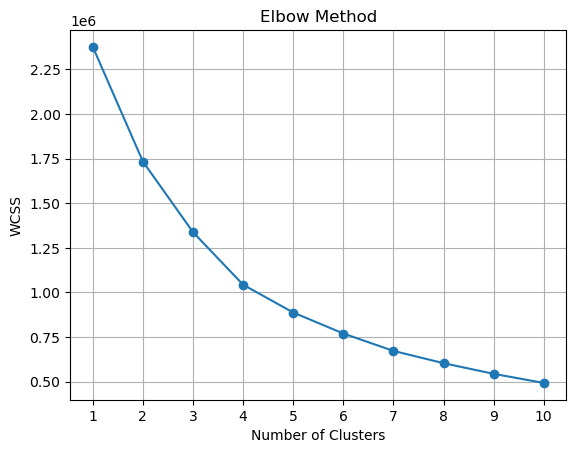

In [13]:
# Elbow Method to determine optimal number of clusters
wcss = []
cluster_range = range(1, 11)  # Test for clusters from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid()
plt.show()


CLUSTERING ON FEATURES OF YEAR , MONTH, HOUR - TIME SERIES ANALYSIS

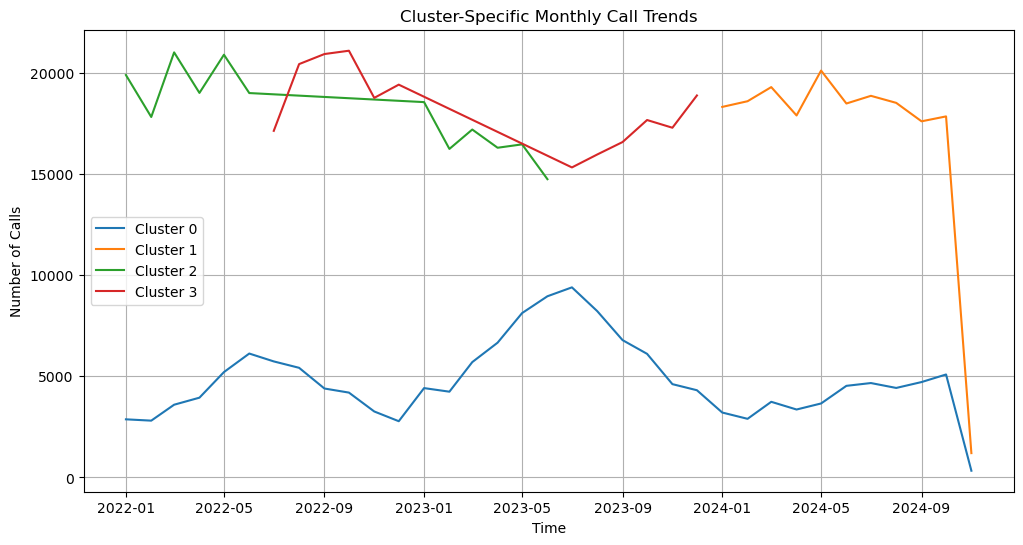

In [16]:
# Group by cluster, year, and month to calculate call counts
cluster_trends = combined_df.groupby(['CLUSTER', 'YEAR', 'MONTH']).size().reset_index(name='CALL_COUNT')

# Create a new column for time without modifying slices
cluster_trends['TIME'] = pd.to_datetime(cluster_trends['YEAR'].astype(str) + '-' + cluster_trends['MONTH'].astype(str))

# Plot trends for each cluster
plt.figure(figsize=(12, 6))
for cluster in cluster_trends['CLUSTER'].unique():
    cluster_data = cluster_trends[cluster_trends['CLUSTER'] == cluster]
    plt.plot(cluster_data['TIME'], cluster_data['CALL_COUNT'], label=f'Cluster {cluster}')
    
# Add plot details
plt.title('Cluster-Specific Monthly Call Trends')
plt.xlabel('Time')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid()
plt.show()


** MAINLYYY FOCUSSS ON THE FACT THAT CLUSTER 2 HAS HIGH CALLS - SO MORE RESOURCES ALLOCATED THERE **



Resource Allocation:

Cluster 2 (Green) shows consistently high call volumes, indicating the need for sustained resources and priority attention to handle critical or frequent calls effectively.
Operational Adjustments:

The sharp drop in Cluster 1 (Orange) in 2024 highlights a potential policy change, improved resolution methods, or reporting gaps. This insight can guide reviews of protocols or reporting systems.
Seasonal Planning:

Cluster 0 (Blue) has predictable seasonal peaks mid-year, allowing for proactive resource deployment during high-demand periods.
Issue Resolution:

Cluster 3 (Red) shows declining trends, possibly signaling the resolution of specific issues or a successful operational shift.



/var/folders/10/b_3jtvwj7hxfslxknmygr6hc0000gn/T/ipykernel_88640/2545293936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLUSTER', y='HOUR', data=combined_df, palette='Set3')


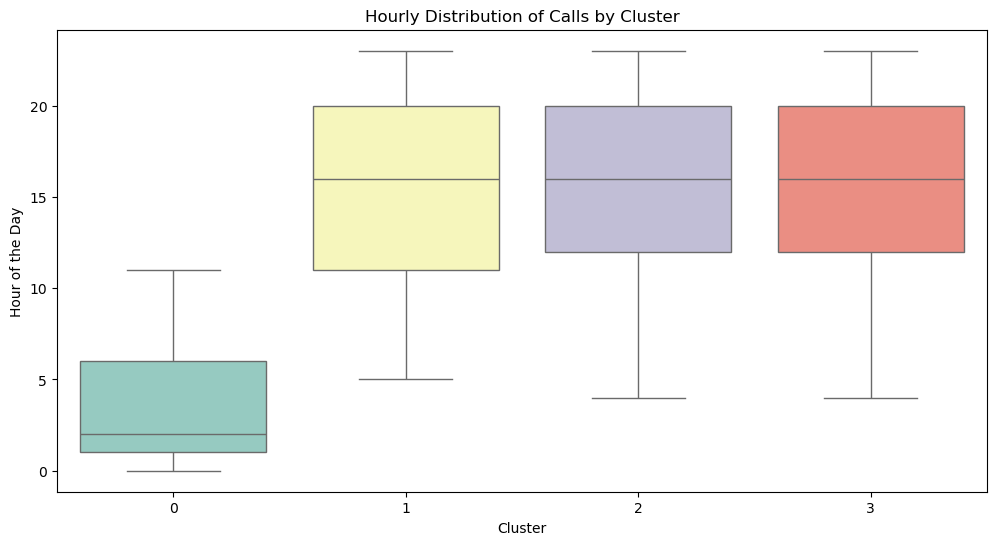

In [22]:
# Create a box plot for call distribution by hour
import seaborn as sns 
plt.figure(figsize=(12, 6))
sns.boxplot(x='CLUSTER', y='HOUR', data=combined_df, palette='Set3')
plt.title('Hourly Distribution of Calls by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Hour of the Day')
plt.show()


In [ ]:
### Quick Summary of the Box Plot Analysis:

1. **Cluster 0** (Teal): 
   - Calls peak **late night to early morning** (midnight to 8 am).
   - Focus on **nighttime disturbances**.

2. **Cluster 1** (Yellow): 
   - Calls peak **mid-morning to early afternoon** (8 am to 2 pm).
   - Likely **routine or daytime activities**.

3. **Cluster 2** (Purple): 
   - Calls span **daytime to early evening** (11 am to 8 pm).
   - Indicates **public events or disturbances**.

4. **Cluster 3** (Red): 
   - Calls peak **afternoon to evening** (1 pm to 10 pm).
   - Likely **critical or high-activity hours**.

### **Actionable Insights**:
- Focus resources for Cluster 0 during late-night hours.
- Shift resources for Clusters 2 & 3  to manage peak daytime and evening incidents.

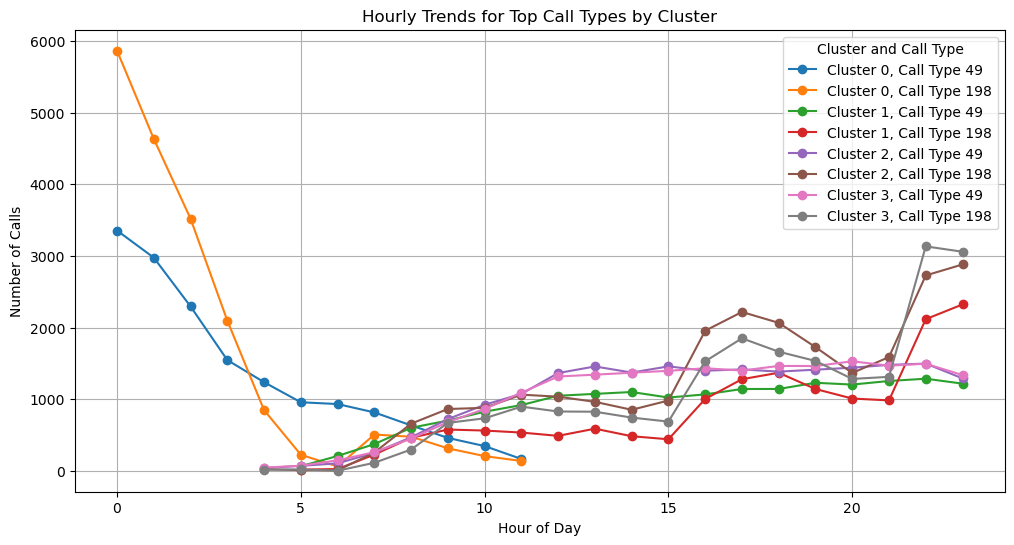

In [24]:
# Group by cluster, hour, and call type
hourly_call_type = combined_df.groupby(['CLUSTER', 'HOUR', 'CALL_TYPE']).size().reset_index(name='CALL_COUNT')

# Filter for the top call types (e.g., Vehicle Stops and Disturbance)
top_call_types = [198, 49]  # Replace with the actual top call type IDs
filtered_hourly_data = hourly_call_type[hourly_call_type['CALL_TYPE'].isin(top_call_types)]

# Plot hourly trends for top call types in each cluster
plt.figure(figsize=(12, 6))
for cluster in filtered_hourly_data['CLUSTER'].unique():
    cluster_data = filtered_hourly_data[filtered_hourly_data['CLUSTER'] == cluster]
    for call_type in cluster_data['CALL_TYPE'].unique():
        data = cluster_data[cluster_data['CALL_TYPE'] == call_type]
        plt.plot(data['HOUR'], data['CALL_COUNT'], marker='o', label=f'Cluster {cluster}, Call Type {call_type}')
plt.title('Hourly Trends for Top Call Types by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.legend(title='Cluster and Call Type')
plt.grid()
plt.show()


### Short Explanation:

1. **Cluster 0**: 
   - **Disturbance (Type 49)** and **Vehicle Stops (Type 198)** peak at **late night (12 AM–4 AM)**.
   - **Insight**: Focus on nighttime patrols for disturbances and proactive traffic enforcement (e.g., DUI checks).

2. **Cluster 1**:
   - **Disturbance (Type 49)** is **evenly distributed** during the day.
   - **Vehicle Stops (Type 198)** show minor activity during **daytime (8 AM–4 PM)**.
   - **Insight**: Routine enforcement and disturbance resolution during business hours.

3. **Cluster 2**:
   - **Disturbances** peak **afternoon (12 PM–4 PM)**; **Vehicle Stops** peak **rush hours (4 PM–6 PM)**.
   - **Insight**: Allocate resources for public disputes and rush-hour traffic enforcement.

4. **Cluster 3**:
   - **Disturbances** peak in the **evening (6 PM–8 PM)**; **Vehicle Stops** peak **late evening (8 PM–10 PM)**.
   - **Insight**: Deploy resources for nighttime traffic enforcement and evening public activities.

### Actionable Insights:
- **Resource Allocation**: Align patrols and teams to peak hours in clusters.
- **Policy**: Address nighttime issues (Cluster 0) and peak activity trends (Cluster 2 and 3).
- **Predictive Modeling**: Use patterns for forecasting call volumes and optimizing schedules.

In [ ]:
CLUSTERING FOR CALL TYPE AND DISPOSITION

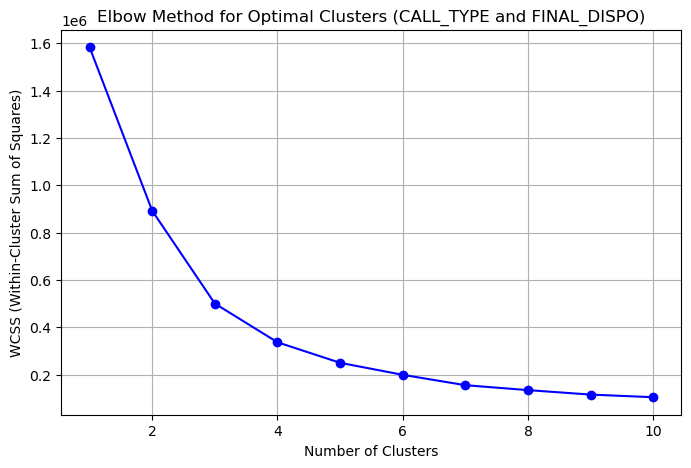

Cluster Centers (CALL_TYPE and FINAL_DISPO):
[[ 0.73797534 -1.2842202 ]
 [ 0.7967928   0.56756395]
 [-1.02398307  0.4498447 ]
 [-1.13792448 -1.55333197]]

Cluster Assignments (Sample):
   CALL_TYPE  FINAL_DISPO  CLUSTER_CALL_FINAL
0        173            9                   1
1         49            9                   2
2        188            2                   0
3        169            9                   1
4        119            0                   0


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
features = combined_df[['CALL_TYPE', 'FINAL_DISPO']]

# Standardize the features to bring them on the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
max_clusters = 10  # Define the maximum number of clusters to test

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal Clusters (CALL_TYPE and FINAL_DISPO)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

# Apply K-Means with a chosen number of clusters (based on the Elbow Graph)
optimal_clusters = 4  # Replace with the number of clusters based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
combined_df['CLUSTER_CALL_FINAL'] = kmeans.fit_predict(scaled_features)

# Print the cluster centers
print("Cluster Centers (CALL_TYPE and FINAL_DISPO):")
print(kmeans.cluster_centers_)

# Add cluster labels to the original DataFrame and display a sample
print("\nCluster Assignments (Sample):")
print(combined_df[['CALL_TYPE', 'FINAL_DISPO', 'CLUSTER_CALL_FINAL']].head())



Resolution Rates by Cluster:
   CLUSTER_CALL_FINAL  Resolution Rate (%)
0                   0             5.190653
1                   1            21.493639
2                   2            17.115705
3                   3             6.899795


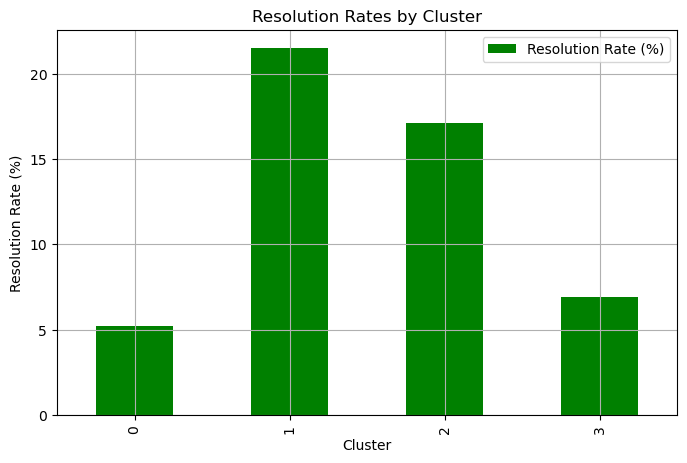

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def resolution_rate_analysis(df):
    # Define actionable dispositions
    actionable_dispo = ['Arrest Made', 'Report Taken', 'Traffic Citation Issued, Hazardous Violation']
    actionable_dispo_ids = [0, 11, 14]  
    
    # Calculate resolution rates per cluster
    cluster_group = df.groupby('CLUSTER_CALL_FINAL')['FINAL_DISPO']
    resolution_rates = cluster_group.apply(lambda x: np.sum(x.isin(actionable_dispo_ids)) / len(x) * 100).reset_index(name='Resolution Rate (%)')
    
    print("\nResolution Rates by Cluster:")
    print(resolution_rates)
    
    # Visualize resolution rates
    resolution_rates.plot(kind='bar', x='CLUSTER_CALL_FINAL', y='Resolution Rate (%)', color='green', figsize=(8, 5))
    plt.title("Resolution Rates by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Resolution Rate (%)")
    plt.grid()
    plt.show()

# Perform resolution rate analysis
resolution_rate_analysis(combined_df)


In [ ]:
This chart depicts the **resolution rates by cluster**, showing the percentage of calls resolved within each cluster.

### Key Insights:

1. **Cluster 1**:
   - **Highest resolution rate** at **21.49%**.
   - Suggests this cluster is most effective at resolving calls.
   - **Interpretation**: Cluster 1 may handle routine or straightforward cases, leading to quicker and more frequent resolutions.

2. **Cluster 2**:
   - Second-highest resolution rate at **17.12%**.
   - Indicates moderate efficiency in resolving calls.
   - **Interpretation**: This cluster may deal with more complex cases compared to Cluster 1 but still achieves a reasonable resolution rate.

3. **Cluster 3**:
   - **Low resolution rate** at **6.90%**.
   - Indicates challenges in resolving calls.
   - **Interpretation**: Cluster 3 might handle difficult or prolonged cases, requiring additional resources or time for resolution.

4. **Cluster 0**:
   - **Lowest resolution rate** at **5.19%**.
   - Suggests significant challenges in resolution.
   - **Interpretation**: This cluster likely involves cases requiring follow-ups, external intervention, or involving unresolved incidents.

---

### Actionable Insights:
- **Cluster 1**: Model and replicate successful strategies to improve resolution rates in other clusters.
- **Cluster 2**: Review case complexity and consider optimizing processes to further boost resolution rates.
- **Cluster 3**: Identify bottlenecks or resource constraints affecting resolution and allocate targeted support.
- **Cluster 0**: Focus on root cause analysis for low resolution, such as call type complexities or operational gaps, and implement corrective actions.

This chart highlights areas for operational improvement and resource allocation based on resolution efficiency across clusters.

### **Conclusion**
This project uses clustering analysis of police call data to optimize **resource allocation**, enhance **public safety**, and improve **operational efficiency**. Key takeaways include:

1. **Resource Deployment**:
   - Focus resources on **high-demand clusters** (e.g., Cluster 2 for peak call volumes) and align patrols with **hourly and seasonal trends**.
   
2. **Proactive Policing**:
   - Anticipate **nighttime disturbances** (Cluster 0) or **rush-hour vehicle stops** (Cluster 3) for targeted interventions and faster response.

3. **Policy Improvements**:
   - Address low-resolution clusters (e.g., Cluster 0) to enhance case resolution rates and optimize follow-up strategies.

4. **Predictive Planning**:
   - Use trends to forecast future calls and dynamically adjust operations for better preparedness.

**Real-Life Impact**:
This data-driven approach enables law enforcement to allocate resources efficiently, reduce response times, and proactively address community needs, making policing more effective and community-focused.

In [44]:
import pandas as pd
from opencage.geocoder import OpenCageGeocode
import folium

# Your OpenCage API Key
API_KEY = '5213e119d8244d9099a162b1e657e0be'
geocoder = OpenCageGeocode(API_KEY)

# Filter the first 100 rows in Cluster 2
cluster_2_data = combined_df[combined_df['CLUSTER'] == 2].head(25)

# Extract unique addresses from Cluster 2 to avoid redundant API calls
unique_addresses = cluster_2_data['ADDRESS'].unique()

# Dictionary to store the geolocation results
address_to_coords = {}

# Fetch geolocation data
for address in unique_addresses:
    try:
        result = geocoder.geocode(f"{address}, {cluster_2_data.iloc[0]['LOCATION']}")
        if result:
            lat = result[0]['geometry']['lat']
            lng = result[0]['geometry']['lng']
            address_to_coords[address] = (lat, lng)
        else:
            address_to_coords[address] = (None, None)  # In case no result is found
    except Exception as e:
        print(f"Error fetching location for address {address}: {e}")
        address_to_coords[address] = (None, None)

# Map geolocations back to the dataset
cluster_2_data['LAT'] = cluster_2_data['ADDRESS'].map(lambda x: address_to_coords[x][0])
cluster_2_data['LNG'] = cluster_2_data['ADDRESS'].map(lambda x: address_to_coords[x][1])

# Drop rows with missing geolocations
cluster_2_data = cluster_2_data.dropna(subset=['LAT', 'LNG'])

# Save the geolocated data to a CSV
cluster_2_data[['ADDRESS', 'LAT', 'LNG']].to_csv('cluster_2_geolocations_first_100.csv', index=False)

# Print extracted longitudes and latitudes
print("\nExtracted Geolocations for Cluster 2 (First 100 Rows):")
print(cluster_2_data[['ADDRESS', 'LAT', 'LNG']])

# Plot the data on a Folium map
map_center = [cluster_2_data['LAT'].mean(), cluster_2_data['LNG'].mean()]
map_cluster_2 = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map
for _, row in cluster_2_data.iterrows():
    folium.Marker(location=[row['LAT'], row['LNG']], popup=row['ADDRESS']).add_to(map_cluster_2)

# Save the map as an HTML file
map_cluster_2.save('cluster_2_map_first_100.html')

# Display the map
map_cluster_2



Extracted Geolocations for Cluster 2 (First 100 Rows):
                         ADDRESS        LAT         LNG
2                    WESTMONT AV  37.271779 -121.993277
4    E CAPITOL EX & EVERGREEN PL  37.305676 -121.812819
54                     FELDER DR  37.228595 -121.809852
55                    AIRPORT BL  37.350771 -121.920732
56                      N 1ST ST  37.422971 -121.965115
57              BASKING RIDGE AV  37.235408 -121.755848
58                    DEEDHAM DR  37.329213 -121.767335
59              BASKING RIDGE AV  37.235408 -121.755848
60                      PEARL AV  37.267770 -121.866977
62    N MARKET ST & W ST JOHN ST  37.338400 -121.894243
63                      N 1ST ST  37.422971 -121.965115
64                   LUCRETIA AV  37.330099 -121.857446
65                     SENTER RD  37.295979 -121.835833
82                      N 4TH ST  37.352662 -121.898567
83                  E ST JOHN ST  37.340690 -121.885321
84  E SANTA CLARA ST & N 13TH ST  37.342079 -121

In [46]:
import pandas as pd
from opencage.geocoder import OpenCageGeocode
import folium

# Your OpenCage API Key
API_KEY = '5213e119d8244d9099a162b1e657e0be'
geocoder = OpenCageGeocode(API_KEY)

# Define colors for clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Filter the first 7 points for each cluster
cluster_data = pd.concat([combined_df[combined_df['CLUSTER'] == i].head(7) for i in range(4)])

# Extract unique addresses from the selected data to avoid redundant API calls
unique_addresses = cluster_data['ADDRESS'].unique()

# Dictionary to store the geolocation results
address_to_coords = {}

# Fetch geolocation data
for address in unique_addresses:
    try:
        result = geocoder.geocode(f"{address}, {cluster_data.iloc[0]['LOCATION']}")
        if result:
            lat = result[0]['geometry']['lat']
            lng = result[0]['geometry']['lng']
            address_to_coords[address] = (lat, lng)
        else:
            address_to_coords[address] = (None, None)  # In case no result is found
    except Exception as e:
        print(f"Error fetching location for address {address}: {e}")
        address_to_coords[address] = (None, None)

# Map geolocations back to the dataset
cluster_data['LAT'] = cluster_data['ADDRESS'].map(lambda x: address_to_coords[x][0])
cluster_data['LNG'] = cluster_data['ADDRESS'].map(lambda x: address_to_coords[x][1])

# Drop rows with missing geolocations
cluster_data = cluster_data.dropna(subset=['LAT', 'LNG'])

# Save the geolocated data to a CSV
cluster_data[['CLUSTER', 'ADDRESS', 'LAT', 'LNG']].to_csv('cluster_geolocations_first_7_per_cluster.csv', index=False)

# Print extracted longitudes and latitudes
print("\nExtracted Geolocations for First 7 Points of Each Cluster:")
print(cluster_data[['CLUSTER', 'ADDRESS', 'LAT', 'LNG']])

# Create the map centered around the mean of all clusters
map_center = [cluster_data['LAT'].mean(), cluster_data['LNG'].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map with different colors for each cluster
for _, row in cluster_data.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LNG']],
        popup=f"Address: {row['ADDRESS']}\nCluster: {row['CLUSTER']}",
        icon=folium.Icon(color=cluster_colors[row['CLUSTER']])
    ).add_to(cluster_map)

# Save the map as an HTML file
cluster_map.save('cluster_map_first_7_per_cluster.html')

# Display the map
cluster_map



Extracted Geolocations for First 7 Points of Each Cluster:
        CLUSTER                       ADDRESS        LAT         LNG
0             0                     JEANNE AV  37.335019 -121.861548
1             0                  SOUTHWEST EX  37.355357 -121.871458
3             0                   GREENLEE DR  37.318225 -121.964283
5             0         BRANHAM LN & SNELL AV  37.265475 -121.831292
6             0      STOCKTON AV & SCHIELE AV  37.338974 -121.911586
7             0  NEW JERSEY AV & DRY CREEK RD  37.287576 -121.910788
8             0         JARVIS AV & BOURET DR  37.263180 -121.891846
580996        1       SERVICE ST & OAKLAND RD  37.369099 -121.890666
580997        1       W TAYLOR ST & ASBURY ST  37.339772 -121.916947
580998        1               BLOSSOM HILL RD  37.251550 -121.814583
580999        1                      SCOTT ST  37.319841 -121.938628
581000        1                   CINNABAR ST  37.337194 -121.905363
581001        1                      STORY 